[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# Train Soccer Player Detector

---

[![Download Dataset](https://app.roboflow.com/images/download-dataset-badge.svg)](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc)

This notebook is based on the [How to Train YOLOv8 Object Detection on a Custom Dataset](https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb) notebook from the [roboflow/notebooks](https://github.com/roboflow/notebooks) repository.

## Configure API keys

- Open your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Wed Aug 27 13:52:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   66C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install dependencies

In [2]:
!pip install -q ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 109.4 MB/s eta 0:00:00


## Imports

In [3]:
from roboflow import Roboflow
from google.colab import userdata
from IPython.display import Image

## Pull dataset

In [12]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("football-cb45m").project("football-player-detection-w0pj7-3rxc2")
version = project.version(1)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Football-Player-Detection-1 in yolov8:: 100%|██████████| 362/362 [00:00<00:00, 4468.83it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**NOTE:** Update `data.yaml` structure to align with the latest requirements of the `ultralytics` package.



In [24]:
!sed -i 's|\(train: \).*|\1../train/images|' {dataset.location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset.location}/data.yaml

## Custom training

In [23]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml batch=2 epochs=50 imgsz=1280 plots=True

/content
Ultralytics 8.3.187 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/Football-Player-Detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1280, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0

Displaying: /content/datasets/Football-Player-Detection-1/train/images/ornek_kayit_mp4-0119_jpg.rf.1354465d90958f52bca885b5e641e740.jpg


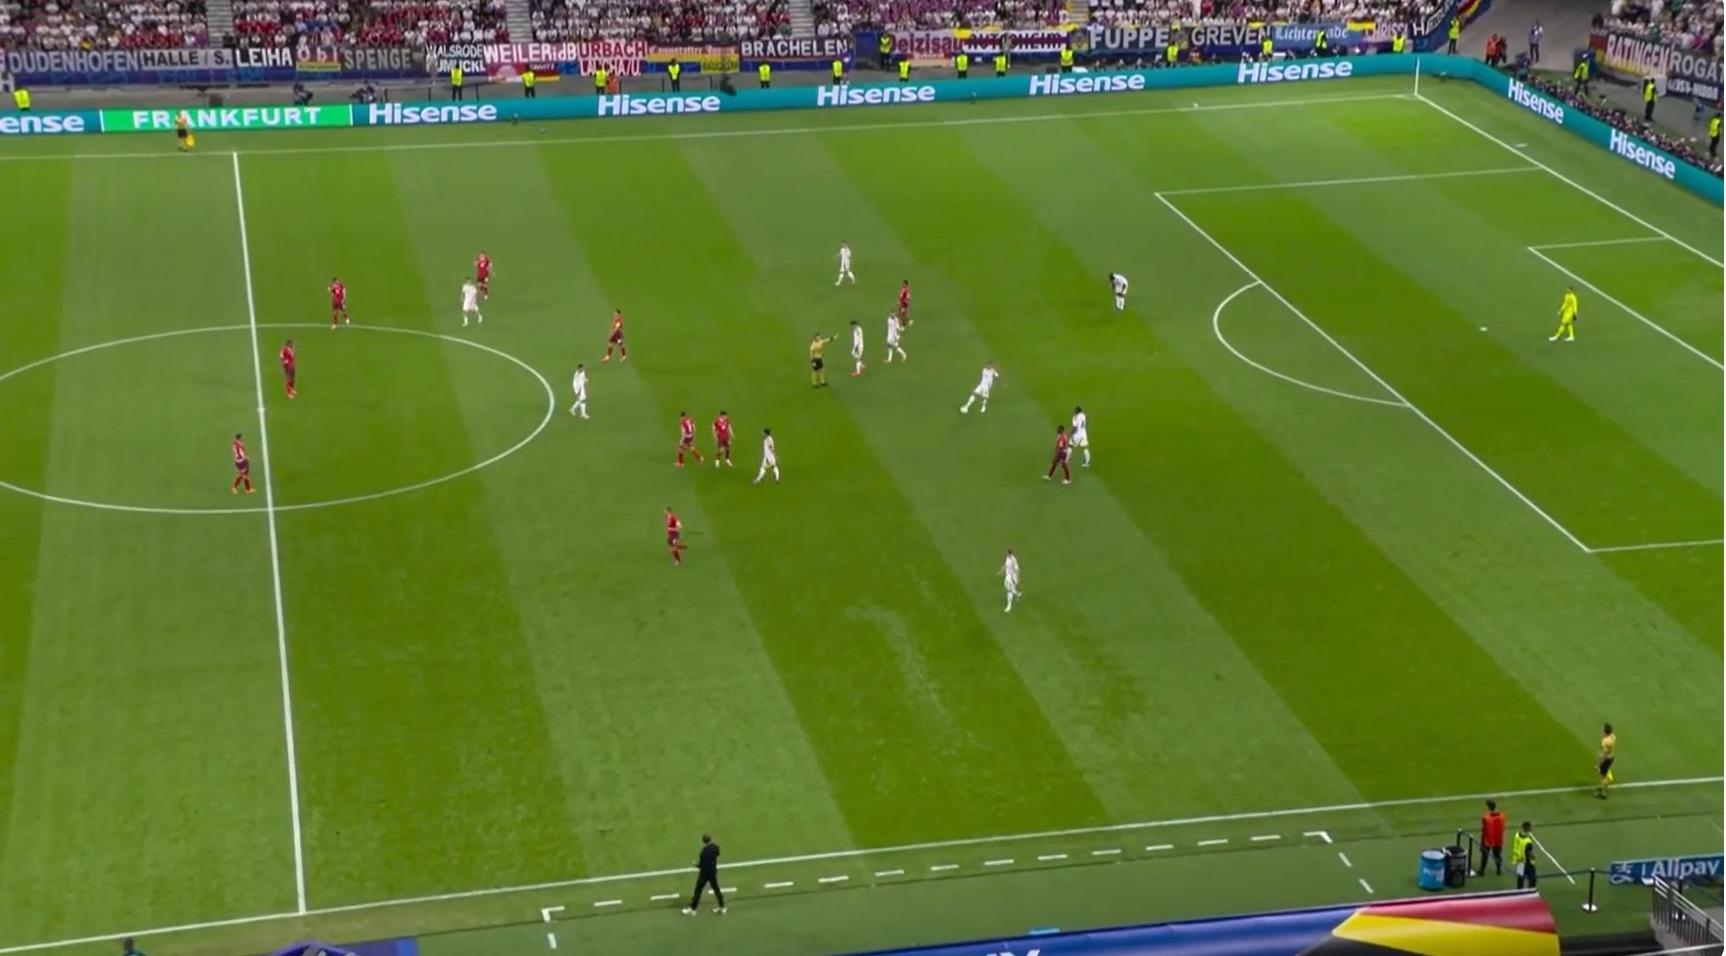

Displaying: /content/datasets/Football-Player-Detection-1/train/images/ornek_kayit_mp4-0013_jpg.rf.53127c1c72dd64c2a4031d7499eb5f17.jpg


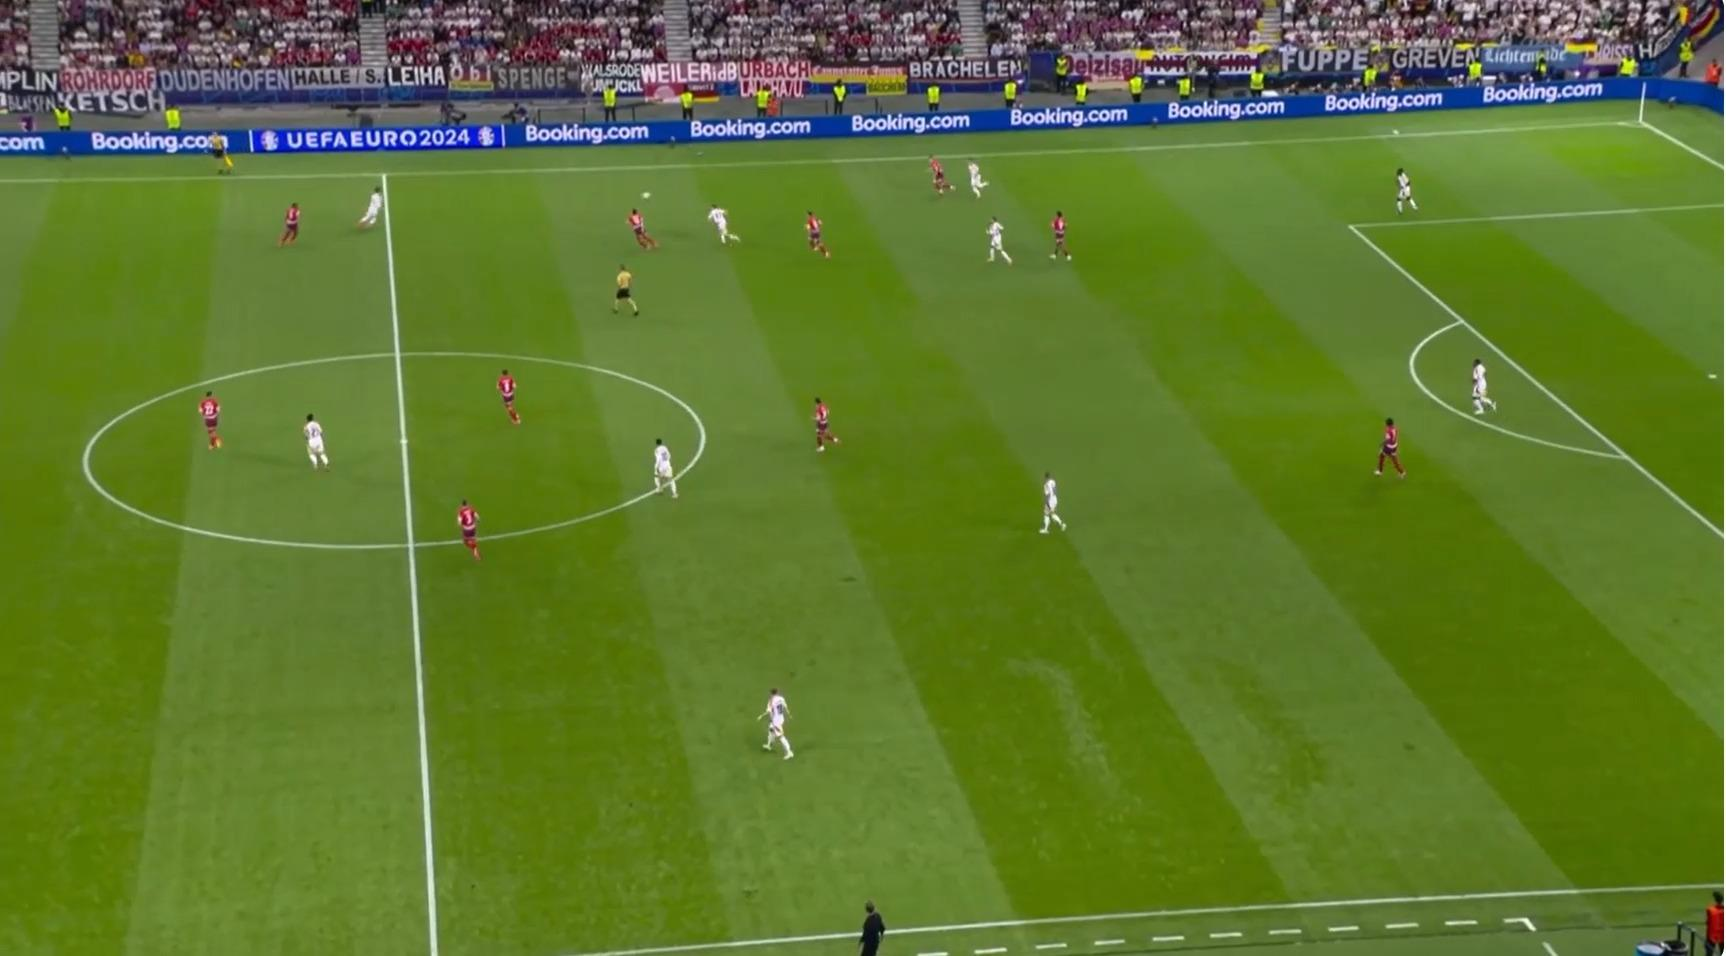

Displaying: /content/datasets/Football-Player-Detection-1/train/images/ornek_kayit_mp4-0081_jpg.rf.9141e82967e8eb905d0540252bbe9d71.jpg


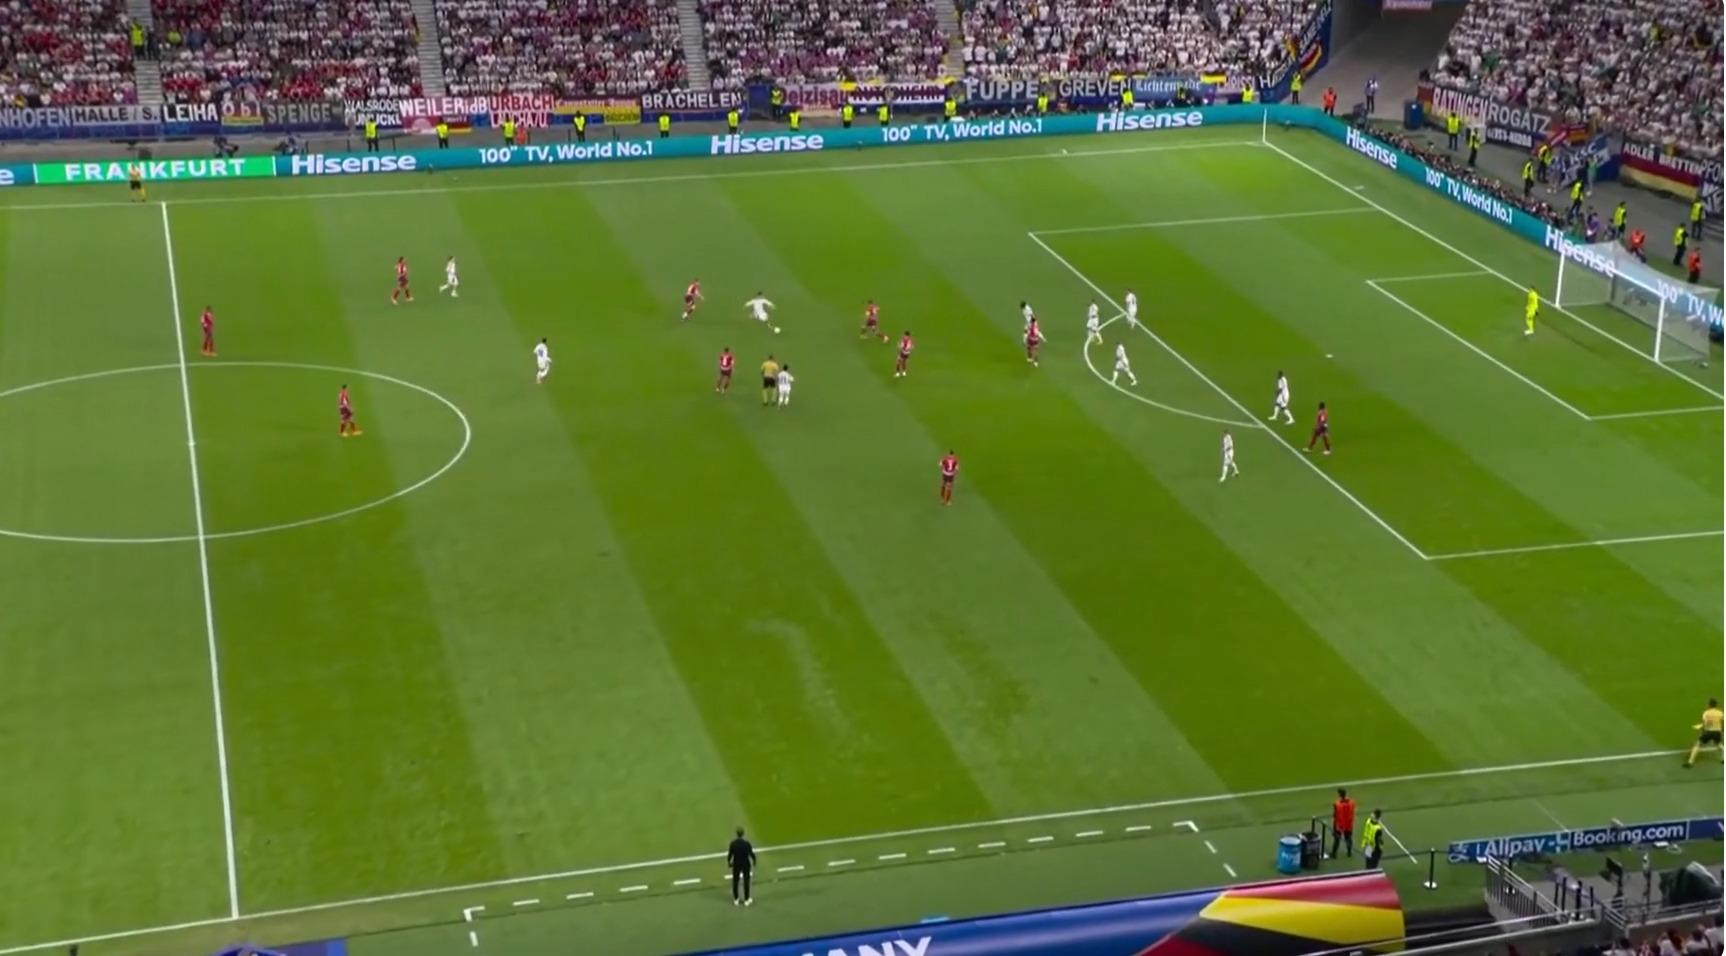

Displaying: /content/datasets/Football-Player-Detection-1/train/images/ornek_kayit_mp4-0030_jpg.rf.b4b886d4c9125bd4265c36ace91046c4.jpg


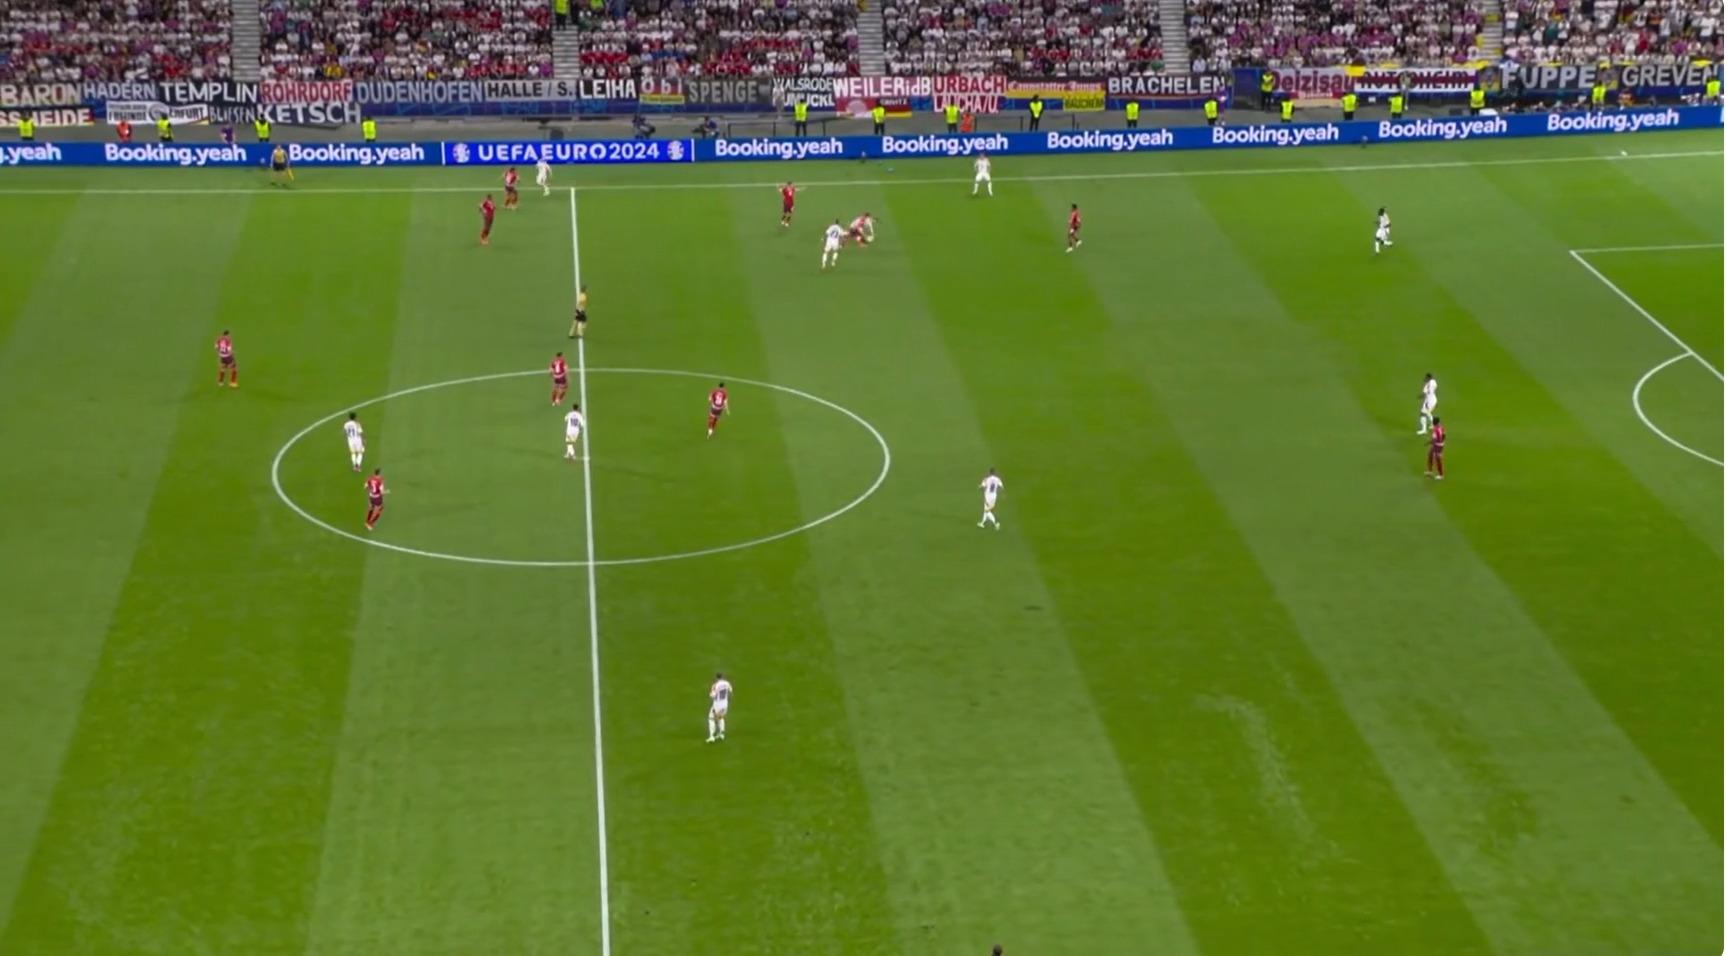

Displaying: /content/datasets/Football-Player-Detection-1/train/images/ornek_kayit_mp4-0123_jpg.rf.3fd709c1a6420702820fc978d29f4ee3.jpg


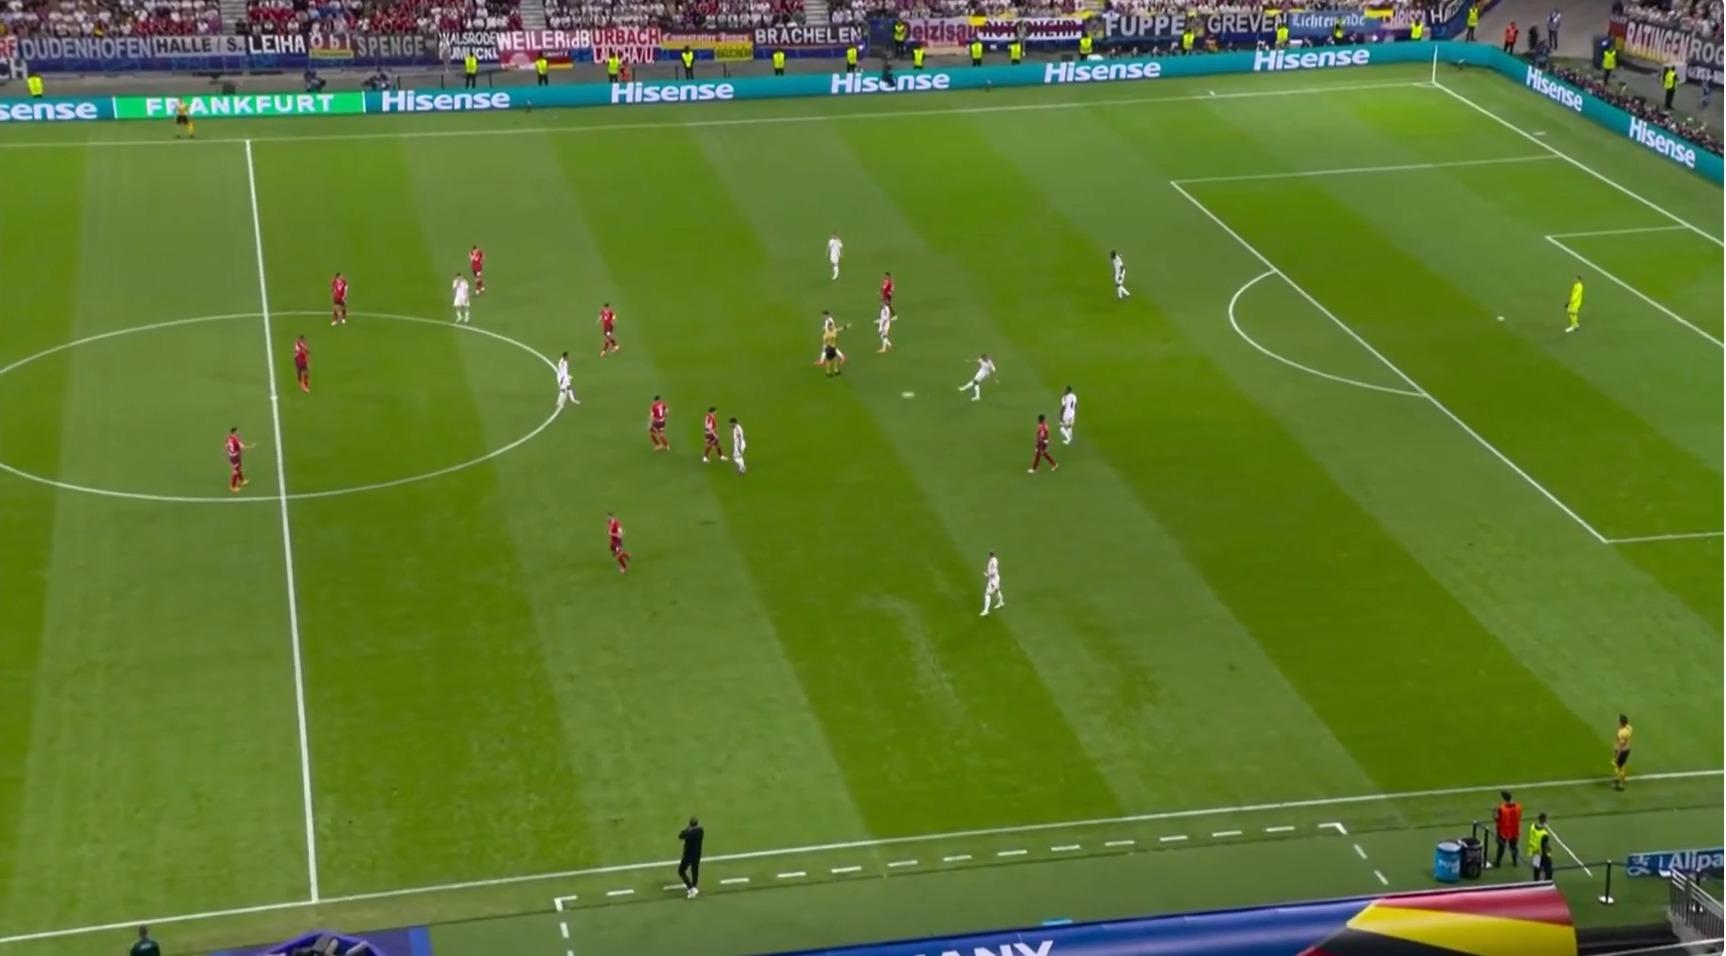

In [25]:
import glob
import random
from IPython.display import Image, display

# Get a list of image files from the training set
train_image_files = glob.glob(f'{dataset.location}/train/images/*.jpg')

# Select a few random images to display
random_images = random.sample(train_image_files, min(5, len(train_image_files)))

# Display the images
for img_path in random_images:
    print(f"Displaying: {img_path}")
    display(Image(filename=img_path))

In [34]:
%cd {HOME}
!yolo task=detect mode=val

/content
WARNING ⚠️ 'data' argument is missing. Using default 'data=coco8.yaml'.
Ultralytics 8.3.187 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 1.0±2.0 ms, read: 924.8±199.0 MB/s, size: 54.0 KB)
val: Scanning /content/datasets/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 4/4 50231.2it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 4.5it/s 0.2s
                   all          4         17       0.57       0.85      0.847      0.632
                person          3         10      0.557        0.6      0.585      0.272
                   dog          1          1      0.548          1      0.995      0.697
                 horse          1          2      0.531          1      0.995      0.674
              elephant          1          2   

In [39]:
import os

# Find the latest training run directory
runs_dir = os.path.join(HOME, 'runs', 'detect')
# List all directories in runs_dir, filter for those starting with 'train', and sort to get the latest one
train_runs = sorted([d for d in os.listdir(runs_dir) if os.path.isdir(os.path.join(runs_dir, d)) and d.startswith('train')])

if train_runs:
    latest_train_run = train_runs[-1]
    latest_run_path = os.path.join(runs_dir, latest_train_run)
    print(f"Found latest training run at: {latest_run_path}")
    project.version(dataset.version).deploy(model_type="yolov8", model_path=latest_run_path)
else:
    print("No training run directories found in", runs_dir)

Found latest training run at: /content/runs/detect/train3
Dependency ultralytics==8.0.196 is required but found version=8.3.187, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.
